In [2]:
import sys
import numpy as np
import csv
import numpy as np
import random
from scipy import stats
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from IPython.display import clear_output
from tqdm import tqdm

sys.path.insert(0, '../simulated_alignments/modules')
sys.path.insert(0,'../../data')

from classBCR import BCR
from gen_code_DNA import genetic_code
sys.path.insert(0, '../equilibrium_mutability/')
from equilibrium_mutability import site_specific_transitions, site_specific_rates
sys.path.append("../../../Downloads/DCATools")
from sequenceHandler import *
from dca import *
from dca_fn import *


In [21]:
datasets = ['TRAV','IGHV','IGLV','IGKV']

In [8]:
directory = 'postprocessed_alignments/'

In [9]:
stockholm2fasta(directory+"concat_aligned",directory+"concat_aligned.fasta",noFilterInserts=False)

In [10]:
len_untrimmed = len(str(next(SeqIO.parse(open(directory+"concat_aligned.fasta"),'fasta')).seq))
to_trim_beg = 8
to_trim_end = 19

In [11]:
concat_trimmed = []
input_file = directory+'concat_aligned.fasta'
fasta_sequences = SeqIO.parse(open(input_file),'fasta')
for fasta in fasta_sequences:
    aa = str(fasta.seq)
    record = SeqRecord(Seq(aa[to_trim_beg:len_untrimmed-to_trim_end]),id = fasta.id, name = fasta.name, description = "" )
    concat_trimmed.append(record)
SeqIO.write(concat_trimmed, directory+"concat_trimmed.fasta", "fasta")

24137

In [22]:
trimmed_dict = {}
trimmed_dict['IGSF'] = []
for label in datasets:
    trimmed_dict[label] = []

In [23]:
input_file = directory+'concat_trimmed.fasta'
fasta_sequences = SeqIO.parse(open(input_file),'fasta')

for fasta in fasta_sequences:
    isIGSF = True
    for label in datasets:
        if label in fasta.id:
            trimmed_dict[label].append(fasta)
            isIGSF = False
            break
            
    if isIGSF:
        trimmed_dict['IGSF'].append(fasta)

SeqIO.write(trimmed_dict['IGSF'], directory+"IGSF_trimmed.fasta", "fasta")
for label in datasets:
    print(label)
    SeqIO.write(trimmed_dict[label], directory+label+"_trimmed.fasta", "fasta")


TRAV
IGHV
IGLV
IGKV


In [24]:
filterSequenceByGapContent(directory+"IGSF_trimmed.fasta",0.25,directory+"IGSF_trimmed_gapfiltered.fasta",verbose=True)


Original number of sequences  0
Sequences after filtering :  22559
Filtered sequences saved to  postprocessed_alignments/IGSF_trimmed_gapfiltered.fasta


In [31]:
input_file = directory+'IGHV_trimmed.fasta'
seq_mat_ighv = fastaToMatrix(input_file)[0]
input_file = directory+'IGSF_trimmed_gapfiltered.fasta'
seq_mat_igsf = fastaToMatrix(input_file)[0]

In [33]:
def hamming_distance(chaine1, chaine2):
    return sum(c1 != c2 for c1, c2 in zip(chaine1, chaine2))

In [34]:
ighv_igsf_dists = np.zeros((len(seq_mat_ighv[:,0]),len(seq_mat_igsf[:,0])))
for j in tqdm(range(len(seq_mat_igsf[:,0]))):
    for i in range(len(seq_mat_ighv[:,0])):
        ighv_igsf_dists[i,j] = hamming_distance(seq_mat_ighv[i,:],seq_mat_igsf[j,:])

100%|██████████| 22559/22559 [26:05<00:00, 14.41it/s]


In [ ]:
plt.hist(np.min(ighv_igsf_dists,axis=0),alpha = 0.6,density= True,bins = 50,label='IGSF')
plt.show()

KeyboardInterrupt: 

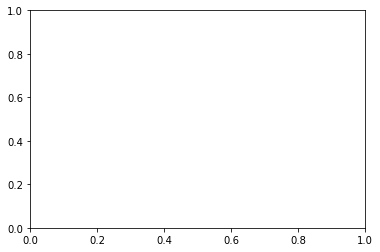

In [35]:
plt.hist(ighv_igsf_dists)

In [38]:
ighv_igsf_dists[1].shape

(22559,)